### Samuel Anyaso-Samuel
### Lab 5
### Chapter 8 - Plotting
## **Unit 41 - Basic Plotting with PyPlot**

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


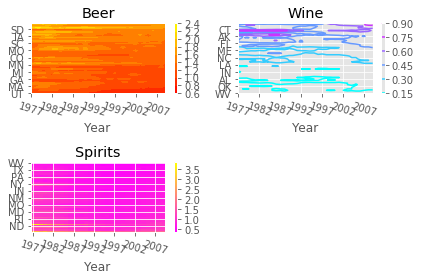

In [9]:
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

# The NIAAA frame has been pickled before
alco = pickle.load(open("alco.pickle", "rb"))
del alco["Total"]
columns, years = alco.unstack().columns.levels


# The state abbreviations come straight from the file
states = pd.read_csv("states.csv", names=("State", "Standard", "Postal", "Capital"))
states = pd.read_csv("states.csv")
states.set_index("State", inplace=True)

# Alcohol consumption will be sorted by year 2009
frames = [pd.merge(alco[column].unstack(), states,left_index=True,
                   right_index=True).sort_values(2009) for column in columns]

# How many years are covered?
span = max(years) - min(years) + 1

# Select a good-looking style
matplotlib.style.use("ggplot")

STEP = 5
# Plot each frame in a subplot
for pos, (draw, style, column, frame) in enumerate(zip(
        (plt.contourf, plt.contour, plt.imshow), # (1)
        (plt.cm.autumn, plt.cm.cool, plt.cm.spring), 
        columns, frames)):
    
    # Select the subplot with 2 rows and 2 columns
    plt.subplot(2, 2, pos + 1) # (2)

    # Plot the frame
    draw(frame[frame.columns[:span]], cmap=style, aspect="auto") # (3)

    # Add embellishments
    plt.colorbar() # (4)
    plt.title(column)
    plt.xlabel("Year")
    plt.xticks(range(0, span, STEP), frame.columns[:span:STEP])
    plt.yticks(range(0, frame.shape[0], STEP), frame.Postal[::STEP])
    plt.xticks(rotation=-17)

plt.tight_layout()
#plt.savefig("../images/pyplot-all.pdf")
plt.show()


### Unit 43: Mastering Embellishments

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


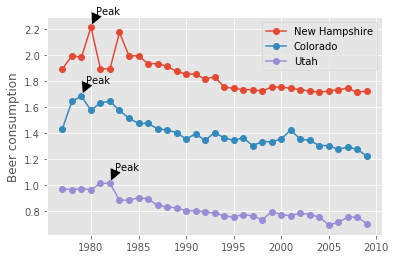

In [2]:
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

# The NIAAA frame has been pickled before
alco = pickle.load(open("alco.pickle", "rb"))

# Select the right data
BEVERAGE = "Beer"
years = alco.index.levels[1].sort_values(ascending=False)
states = ("New Hampshire", "Colorado", "Utah")

# Select a good-looking style
#plt.xkcd()
matplotlib.style.use("ggplot")

# Plot the charts
for state in states:
    ydata = alco.ix[state][BEVERAGE]
    plt.plot(years, ydata, "-o")
    
    # Add annotations with arrows
    plt.annotate(s="Peak", xy=(ydata.argmax(), ydata.max()),
             xytext=(ydata.argmax() + 0.5, ydata.max() + 0.1),
             arrowprops={"facecolor": "black", "shrink": 0.2})
    
# Add labels and legends
plt.ylabel(BEVERAGE + " consumption")
#plt.title("And now in xkcd...")
plt.legend(states)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


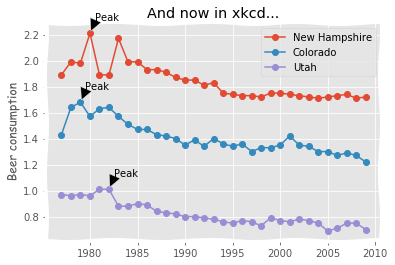

In [3]:
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

# The NIAAA frame has been pickled before
alco = pickle.load(open("alco.pickle", "rb"))

# Select the right data
BEVERAGE = "Beer"
years = alco.index.levels[1].sort_values(ascending=False)
states = ("New Hampshire", "Colorado", "Utah")

# Select a good-looking style
plt.xkcd()
matplotlib.style.use("ggplot")

# Plot the charts
for state in states:
    ydata = alco.ix[state][BEVERAGE]
    plt.plot(years, ydata, "-o")
    
    # Add annotations with arrows
    plt.annotate(s="Peak", xy=(ydata.argmax(), ydata.max()),
             xytext=(ydata.argmax() + 0.5, ydata.max() + 0.1),
             arrowprops={"facecolor": "black", "shrink": 0.2})
    
# Add labels and legends
plt.ylabel(BEVERAGE + " consumption")
plt.title("And now in xkcd...")
plt.legend(states)


### Unit 44: Plotting with Pandas

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


Text(0.5,1,'New Hampshire: From Beer to Wine in 32 Years')

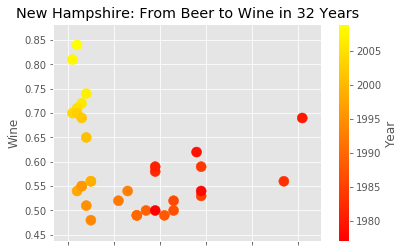

In [8]:
%reset -f
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

# The NIAAA frame has been pickled before
alco = pickle.load(open("alco.pickle", "rb"))

# Select a good-locking style
matplotlib.style.use("ggplot")

# Do the scatter plot
STATE = "New Hampshire"
statedata = alco.ix[STATE].reset_index()
statedata.plot.scatter("Beer", "Wine", c="Year", s=100, cmap=plt.cm.autumn)
plt.xlabel("Beer")
plt.title("%s: From Beer to Wine in 32 Years" % STATE)
#plt.savefig("../images/scatter-plot.pdf")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


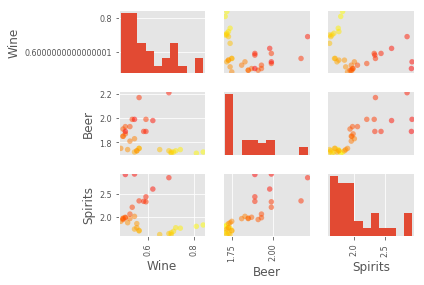

In [5]:
from pandas.tools.plotting import scatter_matrix
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

# The NIAAA frame has been pickled before
alco = pickle.load(open("alco.pickle", "rb"))

# Select a good-locking style
matplotlib.style.use("ggplot")

# Plot the scatter matrix
STATE = "New Hampshire"
statedata = alco.ix[STATE].reset_index()
scatter_matrix(statedata[["Wine", "Beer", "Spirits"]],
               s=120, c=statedata["Year"], cmap=plt.cm.autumn)
plt.tight_layout()
#plt.savefig("../images/scatter-matrix.pdf")

## Your Turn: American Pie

Text(0,0.5,'')

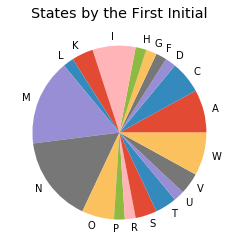

In [6]:
from pandas.tools.plotting import scatter_matrix
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd
states = pd.read_csv("states.csv")
initial = states['Standard']
first = []
for state in initial:
    first.append(state[0])


matplotlib.style.use("ggplot")
# Plotting
plt.axes(aspect=1)
states.set_index('Postal').groupby(first).count()['Standard'].plot.pie()
plt.title("States by the First Initial")
plt.ylabel('')


## Population of California

Text(0.5,1,'Change in CA population from 2001 - 2009')

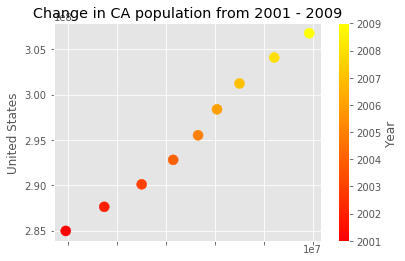

In [7]:
US_CA = pd.read_csv("CALIpopulationData.csv")          # Reads the csv file from current directory
US_CA.plot.scatter("California", "United States", c="Year", s = 100, cmap=plt.cm.autumn)
plt.xlabel("California")
plt.title("Change in CA population from 2001 - 2009")